# Pandas and Xarray

Here we will focus on **pandas** and **xarray**. **numpy** functions are widely used even within **pandas** and **xarray**. 

## Differences Between xarray and pandas  

| Feature | **pandas** | **xarray** |
|---------|----------|----------|
| **Data Structure** | 1D (Series) & 2D (DataFrame) | N-dimensional arrays (DataArray, Dataset) |
| **Indexing** | Labels for rows/columns | Labels for multiple dimensions (multi-dimensional indexing) |
| **Handling of Dimensions** | Works best with tabular data | Designed for multi-dimensional data (e.g., time, latitude, longitude) |
| **Performance** | Optimized for 1D & 2D operations | Optimized for large multi-dimensional datasets |
| **Multi-Indexing** | Supported but can get complex | Native multi-dimensional indexing |
| **NetCDF & Scientific Data Support** | No built-in support | Built-in support for NetCDF, GRIB, and HDF5 formats (limited Zarr support) |
| **Aggregation & Reduction** | Groupby and pivot for summarization | Can reduce over multiple dimensions easily |
| **Memory Usage** | Efficient for tabular data | Can be optimized with chunking via Dask |
| **Integration with Dask** | Limited support | Natively supports lazy loading & parallel computation |
| **Use Case** | Best for structured tabular data (e.g., CSV, SQL) | Best for multi-dimensional scientific data (e.g., climate models, geospatial, satellite data) |

## When to Use Pandas vs. Xarray?  

🔹 **Use Pandas when:**  
- You have **structured, tabular data** (like CSV, Excel, SQL).  
- Your data fits well in **rows and columns**.  
- You need **fast operations on 1D or 2D datasets**.  

🔹 **Use Xarray when:**  
- Your data is **multi-dimensional** (e.g., climate, geospatial, satellite data).  
- You work with **scientific datasets** (NetCDF, GRIB, HDF5).  
- You need **efficient handling of large datasets** with parallel processing (via Dask).  
- You require **native multi-dimensional indexing and operations**.

# Pandas

Find the [pandas reference here](https://pandas.pydata.org/docs/index.html)  

A good way to learn pandas is through [10 minutes to pandas](https://pandas.pydata.org/docs/user_guide/10min.html)

In [3]:
import pandas as pd
import uwa

### Creating a DatFrame in Pandas  

```DataFrames``` are pretty much the same as ```dataframes``` in ```R``` basically the tabular form of Python dictionaries and can be create quickly:

In [4]:
pd.DataFrame({'First':[1,2,3],
              "Second":["One", "Two", "Three"]})

,First,Second
0,1,One
1,2,Two
2,3,Three


We can use the `uwa` package to generate results in a loop and combine the resuls dict into a dataframe:

In [5]:
nfs = pd.DataFrame([ #convert to dataframe
    uwa.AcousticWave(speed =1470, frequency=f * 1000, bw=b).__dict__  #extract all attributes as dict
    for f in range(10,101) #loop over a range of frequencies
    for b in range(3,20) #loop over a range of beam widths
])

#let's see the Dataframe
nfs

,frequency,speed,bw,wl,k,ar,rnf
0,10000,1470,3,0.1470,42.742757,2.860016,43.702814
1,10000,1470,4,0.1470,42.742757,2.145202,24.587202
2,10000,1470,5,0.1470,42.742757,1.716358,15.739405
3,10000,1470,6,0.1470,42.742757,1.430498,10.933195
4,10000,1470,7,0.1470,42.742757,1.226344,8.035203
...,...,...,...,...,...,...,...
1542,100000,1470,15,0.0147,427.427572,0.057357,0.175773
1543,100000,1470,16,0.0147,427.427572,0.053794,0.154610
1544,100000,1470,17,0.0147,427.427572,0.050651,0.137070
1545,100000,1470,18,0.0147,427.427572,0.047858,0.122372


Pandas is useful to read tabular files like csv files as `pd.read_csv(filename)` and supports a long list of [other file formats](https://pandas.pydata.org/docs/user_guide/io.html).  
Pandas Dataframes use indexing a lot and [MultiIndexes](https://pandas.pydata.org/docs/user_guide/advanced.html) are common:

In [6]:
nfs = nfs.set_index(['frequency', 'bw'])
nfs

speed      wl           k        ar        rnf
frequency bw                                                
10000     3    1470  0.1470   42.742757  2.860016  43.702814
          4    1470  0.1470   42.742757  2.145202  24.587202
          5    1470  0.1470   42.742757  1.716358  15.739405
          6    1470  0.1470   42.742757  1.430498  10.933195
          7    1470  0.1470   42.742757  1.226344   8.035203
...             ...     ...         ...       ...        ...
100000    15   1470  0.0147  427.427572  0.057357   0.175773
          16   1470  0.0147  427.427572  0.053794   0.154610
          17   1470  0.0147  427.427572  0.050651   0.137070
          18   1470  0.0147  427.427572  0.047858   0.122372
          19   1470  0.0147  427.427572  0.045361   0.109933

[1547 rows x 5 columns]

### Data Wrangling  

There a loads of built-in functions in **pandas** to manipulate data frames, including summarising, handling missing data, combining data, reshaping data or grouping data, and more. [Cheat sheets can be very useful to get an overview](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)



### Pandas Plotting  

Pandas has some built-in basic plotting capabilities. Here some examples:

<Axes: xlabel='Frequency (Hz)', ylabel='Beam width (°)'>

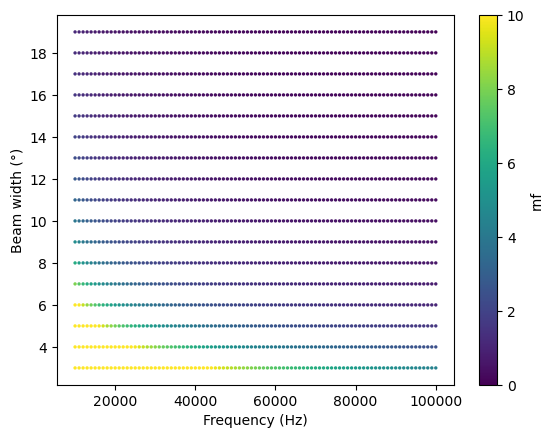

In [9]:
nfs.reset_index().plot.scatter(x="frequency", y="bw", #x and y axes
                               c="rnf", #color vairable
                               clim=[0,10], #colorscale limits
                               s=2, #size of scatter
                               xlabel="Frequency (Hz)", #x axis title
                               ylabel="Beam width (°)") #y axis title

<Axes: title={'center': 'rnf'}, xlabel='Beam width (°)', ylabel='Nearfield (m)'>

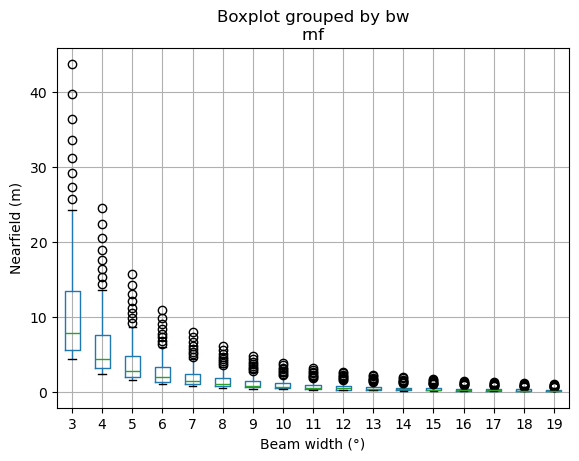

In [10]:
nfs.boxplot(column="rnf", by="bw", xlabel="Beam width (°)", ylabel="Nearfield (m)")

#### Heatmaps  

[Seaborn](https://seaborn.pydata.org/) is the easiest way to create heatmaps.

<Axes: xlabel='None-bw', ylabel='frequency'>

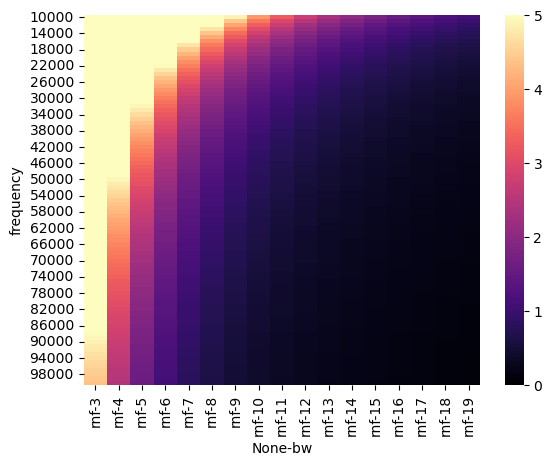

In [11]:
import seaborn as sns  

#we use the rnf column, then we reset the index, to use frequency and bw as our new rows (index) and columns.
nfs_piv = nfs.rnf.reset_index().pivot(index="frequency", columns="bw")

sns.heatmap(nfs_piv, #data to use
            annot=False,#add values to cells
            vmin=0, #minimum color value
            vmax=5, #maximum color value
            cmap="magma") #colorscale

### Comparison of Pandas and R dplyr

| Task                | R dplyr | Python pandas |
|---------------------|--------|--------------|
| **Loading Library** | `library(dplyr)` | `import pandas as pd` |
| **Reading Data** | `df <- read.csv("file.csv")` | `df = pd.read_csv("file.csv")` |
| **Selecting Columns** | `df %>% select(col1, col2)` | `df[['col1', 'col2']]` |
| **Filtering Rows** | `df %>% filter(col1 > 10)` | `df[df['col1'] > 10]` |
| **Mutating (Adding Columns)** | `df %>% mutate(new_col = col1 * 2)` | `df['new_col'] = df['col1'] * 2` |
| **Renaming Columns** | `df %>% rename(new_col1 = old_col1)` | `df = df.rename(columns={'old_col1': 'new_col1'})` |
| **Grouping Data** | `df %>% group_by(col1) %>% summarize(mean_val = mean(col2))` | `df.groupby('col1')['col2'].mean().reset_index()` |
| **Sorting Data** | `df %>% arrange(col1)` | `df.sort_values('col1')` |
| **Dropping Columns** | `df %>% select(-col1)` | `df.drop(columns=['col1'])` |
| **Counting Rows** | `df %>% count(col1)` | `df['col1'].value_counts()` |
| **Pivoting (Wider Format)** | `df %>% spread(key, value)` | `df.pivot(index, columns, values)` |
| **Pivoting (Longer Format)** | `df %>% gather(key, value, col1:col3)` | `df.melt(id_vars, var_name, value_name)` |
| **Merging (Join)** | `df1 %>% left_join(df2, by = "key")` | `df1.merge(df2, on='key', how='left')` |
| **Distinct Rows** | `df %>% distinct()` | `df.drop_duplicates()` |
| **Replacing NA Values** | `df %>% replace_na(list(col1 = 0))` | `df.fillna({'col1': 0})` |


| Feature | Pandas | dplyr |
|---------|--------|--------|
| **Multi-indexing (Hierarchical Indexing)** | ✅ | ❌ |
| **Time Series Handling** | ✅ | ❌ |
| **Merging on Multiple Columns** | ✅ | ✅ (but less flexible) |
| **Missing Value Handling** | ✅ | ✅ (but more manual) |
| **Rolling/Expanding Windows** | ✅ | ❌ |
| **Performance Optimizations (Cython, NumPy)** | ✅ | ❌ |
| **Pipe Operator (`%>%`) for readibility** | ❌ | ✅ |
| **Grouped Mutate** | ❌ (requires lambda) | ✅ |
| **Tidy Data Transformations** | ❌ | ✅ |
| **Verb-Based Function Naming** | ❌ | ✅ |
| **Multiple Summaries Easily** | ❌ (requires dict/lambda) | ✅ |
| **Factor (Categorical) Handling** | ❌ (manual) | ✅ (native) |



In [ ]:
# Xarray  

Xarray provides an excellent [introduction tutorial](https://tutorial.xarray.dev/intro.html)  

Xarray mainly works with Datasets and DataArrays. Datasets are containers of DataArrays.  

Let's illustrate this by an MVBS dataset, created within echopype:

In [14]:
import xarray as xr 

mvbs = xr.open_dataset("./python_plotting_files/mvbs.nc")
mvbs

<xarray.Dataset> Size: 668kB
Dimensions:            (channel: 4, ping_time: 56, depth: 370)
Coordinates:
  * ping_time          (ping_time) datetime64[ns] 448B 2018-03-08T17:37:40 .....
  * channel            (channel) <U37 592B 'GPT  18 kHz 00907206dc7f 1-1 ES18...
  * depth              (depth) float64 3kB 0.0 1.0 2.0 3.0 ... 367.0 368.0 369.0
    distance           (ping_time) float64 448B ...
Data variables:
    Sv                 (channel, ping_time, depth) float64 663kB ...
    latitude           (ping_time) float64 448B ...
    longitude          (ping_time) float64 448B ...
    frequency_nominal  (channel) float64 32B ...
Attributes:
    processing_software_name:     echopype
    processing_software_version:  0.10.0
    processing_time:              2025-04-02T16:37:50Z
    processing_function:          commongrid.compute_MVBS
    processing_level:             Level 3A
    processing_level_url:         https://echopype.readthedocs.io/en/stable/p...

## DataArray  

We can pull out the dataarray Sv using `.` notation

In [16]:
sv = mvbs.Sv
sv

<xarray.DataArray 'Sv' (channel: 4, ping_time: 56, depth: 370)> Size: 663kB
[82880 values with dtype=float64]
Coordinates:
  * ping_time  (ping_time) datetime64[ns] 448B 2018-03-08T17:37:40 ... 2018-0...
  * channel    (channel) <U37 592B 'GPT  18 kHz 00907206dc7f 1-1 ES18-11' ......
  * depth      (depth) float64 3kB 0.0 1.0 2.0 3.0 ... 366.0 367.0 368.0 369.0
    distance   (ping_time) float64 448B ...
Attributes:
    long_name:             Mean volume backscattering strength (MVBS, mean Sv...
    units:                 dB
    cell_methods:          ping_time: mean (interval: 20 second comment: ping...
    binning_mode:          physical units
    range_meter_interval:  1.0m
    ping_time_interval:    20s

## Dimensions  

`.dims` - Dimensions, are the axes of the data, here the channel, ping_time and depth

In [17]:
sv.dims

('channel', 'ping_time', 'depth')

## Coordinates

`.coords` contains the coordinate variables

In [19]:
sv.coords

Coordinates:
  * ping_time  (ping_time) datetime64[ns] 448B 2018-03-08T17:37:40 ... 2018-0...
  * channel    (channel) <U37 592B 'GPT  18 kHz 00907206dc7f 1-1 ES18-11' ......
  * depth      (depth) float64 3kB 0.0 1.0 2.0 3.0 ... 366.0 367.0 368.0 369.0
    distance   (ping_time) float64 448B ...

In [20]:
sv.ping_time

<xarray.DataArray 'ping_time' (ping_time: 56)> Size: 448B
array(['2018-03-08T17:37:40.000000000', '2018-03-08T17:38:00.000000000',
       '2018-03-08T17:38:20.000000000', '2018-03-08T17:38:40.000000000',
       '2018-03-08T17:39:00.000000000', '2018-03-08T17:39:20.000000000',
       '2018-03-08T17:39:40.000000000', '2018-03-08T17:40:00.000000000',
       '2018-03-08T17:40:20.000000000', '2018-03-08T17:40:40.000000000',
       '2018-03-08T17:41:00.000000000', '2018-03-08T17:41:20.000000000',
       '2018-03-08T17:41:40.000000000', '2018-03-08T17:42:00.000000000',
       '2018-03-08T17:42:20.000000000', '2018-03-08T17:42:40.000000000',
       '2018-03-08T17:43:00.000000000', '2018-03-08T17:43:20.000000000',
       '2018-03-08T17:43:40.000000000', '2018-03-08T17:44:00.000000000',
       '2018-03-08T17:44:20.000000000', '2018-03-08T17:44:40.000000000',
       '2018-03-08T17:45:00.000000000', '2018-03-08T17:45:20.000000000',
       '2018-03-08T17:45:40.000000000', '2018-03-08T17:46:00.000000000',
       '2018-03-08T17:46:20.000000000', '2018-03-08T17:46:40.000000000',
       '2018-03-08T17:47:00.000000000', '2018-03-08T17:47:20.000000000',
       '2018-03-08T17:47:40.000000000', '2018-03-08T17:48:00.000000000',
       '2018-03-08T17:48:20.000000000', '2018-03-08T17:48:40.000000000',
       '2018-03-08T17:49:00.000000000', '2018-03-08T17:49:20.000000000',
       '2018-03-08T17:49:40.000000000', '2018-03-08T17:50:00.000000000',
       '2018-03-08T17:50:20.000000000', '2018-03-08T17:50:40.000000000',
       '2018-03-08T17:51:00.000000000', '2018-03-08T17:51:20.000000000',
       '2018-03-08T17:51:40.000000000', '2018-03-08T17:52:00.000000000',
       '2018-03-08T17:52:20.000000000', '2018-03-08T17:52:40.000000000',
       '2018-03-08T17:53:00.000000000', '2018-03-08T17:53:20.000000000',
       '2018-03-08T17:53:40.000000000', '2018-03-08T17:54:00.000000000',
       '2018-03-08T17:54:20.000000000', '2018-03-08T17:54:40.000000000',
       '2018-03-08T17:55:00.000000000', '2018-03-08T17:55:20.000000000',
       '2018-03-08T17:55:40.000000000', '2018-03-08T17:56:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * ping_time  (ping_time) datetime64[ns] 448B 2018-03-08T17:37:40 ... 2018-0...
    distance   (ping_time) float64 448B ...
Attributes:
    long_name:      Ping time
    standard_name:  time
    axis:           T

## Arbitrary attributes  

`.attrs` accesses arbitrary Python objects

In [21]:
sv.attrs

{'long_name': 'Mean volume backscattering strength (MVBS, mean Sv re 1 m-1)',
 'units': 'dB',
 'cell_methods': 'ping_time: mean (interval: 20 second comment: ping_time is the interval start) depth: mean (interval: 1.0 meter comment: depth is the interval start)',
 'binning_mode': 'physical units',
 'range_meter_interval': '1.0m',
 'ping_time_interval': '20s'}

## Underlying data  

`.data` provides a numpy array of the data.

In [22]:
sv.data

array([[[  -5.39899748,  -48.07659193,  -63.75903519, ...,
          -71.56176958,  -70.07443808,  -73.61853404],
        [  -5.39841889,  -47.99347366,  -60.37225114, ...,
          -72.11076332,  -70.23981213,  -64.47404412],
        [  -5.40472683,  -47.72382744,  -62.67726021, ...,
          -71.63455799,  -72.10542816,  -70.33461994],
        ...,
        [  -5.39827401,  -47.86048276,  -54.00332204, ...,
          -85.95707529,  -84.63576156,  -72.2805111 ],
        [  -5.39912171,  -48.10224624,  -60.93082939, ...,
          -84.55301826,  -84.70536263,  -83.24944725],
        [  -5.39758431,  -48.26197719,  -64.18465403, ...,
          -86.28710553,  -86.81176325,  -88.76636258]],

       [[   3.15885377,  -38.44519798,  -54.36227604, ...,
          -80.13906637,  -80.45344653,  -81.97789315],
        [   3.15592311,  -38.23343805,  -52.12854729, ...,
          -78.7256882 ,  -78.5418573 ,  -78.27049983],
        [   3.15616802,  -37.4288255 ,  -50.63572917, ...,
          -81.

## Plotting  

Plotting can be done easily:
- we use the `.`notation to select the DatArray `mvbs.Sv`
- we select one channel of the data through indexing `.isel(channel=1)`
- we want to plot `.plot`
- we want `ping_time` to represent the x axis and `depth` the y axis and we want depth to have 0 on top: `x='ping_time', y='depth', yincrease = False`
- we want some additional decorations, so we set the colormap `cmap='RdYlBu_r'` and we set the colorbar limits to be within `vmin=-75` and `vmax=-40`

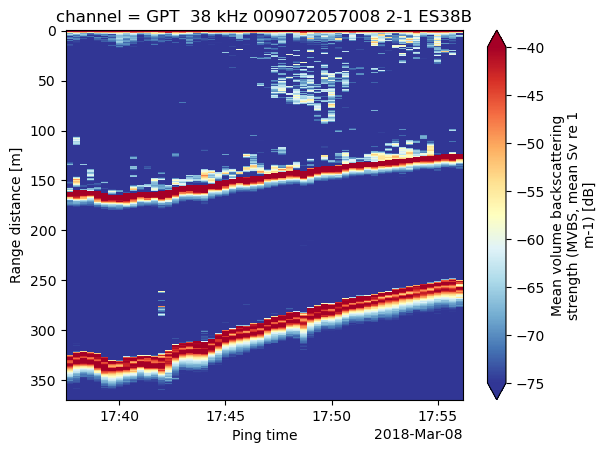

In [37]:
mvbs.Sv.isel(channel=1).plot(x="ping_time", y="depth", 
                             yincrease=False, 
                             cmap="RdYlBu_r", 
                             vmin=-75, vmax=-40)